# Chapter 16 Fourier Series

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## Approximation by trigonometric polynomials

Periodic fuction $ f(x + \tau) = f(x)$, $\tau$ period

Trigonometric polynomial of order $n$, $p(x)$ is $2\pi$ periodic
$$ p(x) = \frac{a_0}{2} + \sum_{j=1}^n [ a_j \cos(jx) + b_j \sin(jx) ] = \sum_{j=-n}^n c_j e^{ij x}$$

$e^{ix} = \cos(x) + i \sin(x)$, 
$$\sum_{j=-n}^n c_j e^{ijx} = \sum_{j=-n}^n c_j [\cos(jx) + i \sin(jx)] 
                            = c_0 + \sum_{j=1}^n [(c_j + c_{-j}) \cos(jx) + i(c_j - c_{-j}) \sin(jx)]$$

$$a_j = c_j + c_{-j}, \quad b_j = c_j - c_{-j}, \quad j=0, \cdots, n$$
$$c_j = (a_j - i b_j)/2, \quad c_{-j} = (a_j + i b_j)/2, \quad j=0, \cdots, n$$
Assume interval $[0, 2 \pi )$ is divided into $n$ equal subintervals

If $p(x)$ is a real function, $c_j = \bar{c}_{-j}$, and
$$a_j = \Re c_j, \quad b_j = -2 \Im c_j$$


Fourier series
$$ f(x) \approx \sum_{j=-\infty}^{\infty} \hat{f}(j) e^{ijx}$$
Fourier coefficients $\hat{f}(j)$
$$\hat{f}(j) = \frac{1}{2\pi} \int_0^{2\pi} f(x) e^{-ijx} dx$$

$$\int_0^{2\pi} e^{-i(k-j)x} dx = 2 \pi  \mbox{ if }  k=j, \quad 0 \mbox{ if } k \ne j $$
This shows that the functions 1, $e^{ix}$, $e^{i2x}$, $\cdots$ are orthogonal.


for $ x_n = 2 \pi n /N,  n=0, 1, \cdots, N-1$
$$\hat{f}_N (j) = \frac{1}{2\pi} \int_0^{2\pi} f(x) e^{-ijx} dx \approx \frac{1}{N} \sum_{n=0}^{N-1} f(x_n) e^{-ijx_n}$$

If $f(x)$ is a real function
$$ p_n (x) = a_0 / 2 + \sum_{m=1}^{n} [a_m \cos mx + b_m \sin mx ]$$
with 
$$ a_m = \frac{2}{N} \sum_{k=0}^{N-1} f(x_k) \cos m x_k$$
$$ b_m = \frac{2}{N} \sum_{k=0}^{N-1} f(x_k) \sin m x_k$$

### Example 1 Trigonometric approximation

1.6 -0.39999999999999986 1.9919186279062242


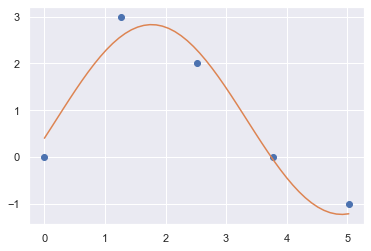

In [3]:
N = 5
n = 1
x = np.arange(N)/N * 2*np.pi
f = np.array([0, 3, 2, 0, -1])

a0 = 2/N*np.sum(f)
a1 = 2/N*np.sum(f*np.cos(x))
b1 = 2/N*np.sum(f*np.sin(x))

print(a0, a1, b1)

xx = np.linspace(0, (N-1)/N*2*np.pi)
ff = a0/2 + a1*np.cos(xx) + b1*np.sin(xx)

plt.plot(x, f, 'o')
plt.plot(xx, ff);

### Example 2 Trigonometric interpolation

[0.03 0.04 0.02 0.05 0.04]
[0.   0.73 0.39 0.14 0.09]


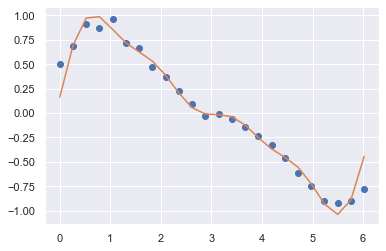

In [3]:
N = 24
n = 5
x = np.arange(N)/N * 2*np.pi
f = np.sin(x) + 0.5*np.cos(1.5*x) + 0.05*np.random.randn(N)

a, b = np.zeros(n), np.zeros(n)
a[0] = 2/N*np.sum(f)
for m in range(1, n):
    a[m] = 2/N*np.sum(f*np.cos(m*x))
    b[m] = 2/N*np.sum(f*np.sin(m*x))

# xx = np.linspace(0, 2*np.pi)
ff = a[0]/2
for m in range(1, n):
    ff += a[m]*np.cos(m*x) + b[m]*np.sin(m*x)

plt.plot(x, f, 'o')
plt.plot(x, ff);

print(np.round(a,2))
print(np.round(b,2))

In [68]:
def fourier_coeff(f, n):
    N = len(f)
    x = np.arange(N)/N*2*np.pi
    a = np.zeros(n)
    b = np.zeros(n)
    a[0] = 2/N*np.sum(f)
    for m in range(1, n):
        a[m] = 2/N*np.sum(f*np.cos(m*x))
        b[m] = 2/N*np.sum(f*np.sin(m*x))
    return a, b

# def fourier_plot(a, b, x):
#     n = len(a)
#     f = a[0]/2*np.ones_like(x)
#     for m in range(1, n):
#         f = f + a[m]*np.cos(m*x) + b[m]*np.sin(m*x)
#     plt.plot(x, f)
    
def fourier_plot(n, a, b, x):
#     n = len(a)
    N = len(x)
    xx = np.arange(N)/N*2*np.pi
    f = a[0]/2*np.ones_like(xx)
    for m in range(1, n):
        f = f + a[m]*np.cos(m*xx) + b[m]*np.sin(m*xx)
    plt.plot(x, f)    

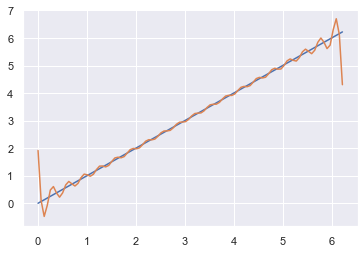

In [72]:
N = 100
x = np.arange(N)/N*2*np.pi
f = x
plt.plot(x, f)
a, b = fourier_coeff(f, 20)

n= 20
fourier_plot(n, a, b, x)

## Discrete Fourier Transform $O(N^2)$
$$X_k = \sum_{n=0}^{N-1} x_n e^{-i\frac{2 \pi}{N} kn}$$
Inverse transform
$$ x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k e^{i\frac{2 \pi}{N} kn}$$

In [73]:
def dft1(x):
    """naive method"""
    N = len(x)
    X = np.zeros_like(x, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n]*np.exp(-1j*2*np.pi/N*k*n)
    return X

def dft(x):
    """efficient method"""
    N = len(x)
    kn = np.arange(N)
    w = np.power(np.exp(-2.j*np.pi/N), kn)
    k = np.mod(np.outer(kn, kn), N)
    return np.matmul(w[k], x)

In [74]:
x = np.array([0, 3, 2, 0, -1])
X = dft1(x)
print(X)
X = dft(x)
print(X)
X = np.fft.fft(x)
print(X)

[ 4.+0.j         -1.-4.97979657j -1.-0.44902798j -1.+0.44902798j
 -1.+4.97979657j]
[ 4.+0.j         -1.-4.97979657j -1.-0.44902798j -1.+0.44902798j
 -1.+4.97979657j]
[ 4.+0.j         -1.-4.97979657j -1.-0.44902798j -1.+0.44902798j
 -1.+4.97979657j]


### FFT, $O(N \log N)$

In [75]:
def prime_factors(n):
    a = []
    while n % 2 == 0:
        a.append(2)
        n //= 2
    f = 3
    while f*f <= n:
        if n % f == 0:
            a.append(f)
            n //= f
        else:
            f += 2
    if n != 1:
        a.append(n)
    return a

def fft_step(x, A, P, B):
    Q = A*P
    kp, kq = np.arange(P), np.arange(Q)
    w = np.power(np.exp(-2.j*np.pi/(Q)), kq)
    k = np.mod(np.einsum("i, j -> ij", kq, kp), Q)
    k.shape, x.shape = (P, A, P), (P, B, A)
    return np.einsum('ijk, klj -> lij', w[k], x)

def fft(x, N=None):
    x = x.copy()
    n = len(x)
    if N is not None:
        x = np.pad(x, (0, N - n)) if n < N else x[:N]
        n = N
    A, B = 1, n
    for P in prime_factors(n):
        B //= P
        x = fft_step(x, A, P, B)
        A *= P
    return x.ravel()

In [76]:
x = np.array([0, 3, 2, 0, -1])
X = fft(x)
print(X)

x = np.array([0, 3, 2, 0, -1])
X = np.fft.fft(x)
print(X)

[ 4.+0.j         -1.-4.97979657j -1.-0.44902798j -1.+0.44902798j
 -1.+4.97979657j]
[ 4.+0.j         -1.-4.97979657j -1.-0.44902798j -1.+0.44902798j
 -1.+4.97979657j]


In [79]:
N = 2**5*3**3
print(N)
x = np.random.random(N)
%timeit np.fft.fft(x)
%timeit fft(x)
%timeit dft(x)

864
18.9 µs ± 3.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
541 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
17.8 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [78]:
3320/112

29.642857142857142

### np.fft.fft

for $ x_n = 2 \pi n /N,  n=0, 1, \cdots, N-1$
$$\hat{f}_N (j) = \frac{1}{2\pi} \int_0^{2\pi} f(x) e^{-ijx} dx \approx \frac{1}{N} \sum_{n=0}^{N-1} f(x_n) e^{-ijx_n}$$

$$X_k = \sum_{n=0}^{N-1} x_n e^{-i\frac{2 \pi}{N} kn}$$

### example 16.3, chapra

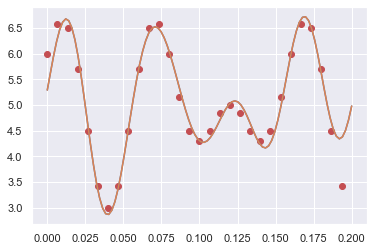

In [82]:
N = 30
p = 0.2
t = np.arange(N)/N*p
y = 5 + np.cos(2*np.pi*12.5*t) + np.sin(2*np.pi*18.75*t) 
plt.plot(t, y, 'ro')


n = 9
a, b = fourier_coeff(y, n)
tt = np.linspace(0, p, 100)  
fourier_plot(6, a, b, tt)


Y = np.fft.fft(y)
aa = np.zeros(n)
bb = np.zeros(n)

aa = 2*np.real(Y[:n])/N
bb[1:] = 2*np.imag(Y[::-1][:n-1])/N
tt = np.linspace(0, p, 100)  
fourier_plot(6, aa, bb, tt)

## Frequency analysis

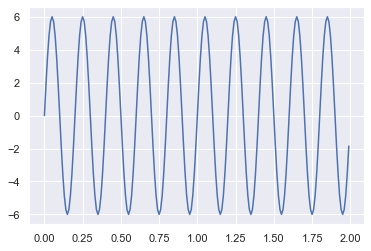

In [55]:
"""
Python 주파수분석 푸리에변환 FFT
"""
N = 1000
dt = 0.01
# t = np.linspace(0, N*dt, N, endpoint=False)
t = np.arange(N)*dt
y = 6*np.sin(2*np.pi*5*t)
plt.plot(t[:200], y[:200]);

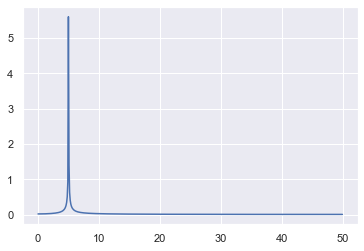

In [56]:
f = np.arange(N//2)/(N*dt)
Y = fft(y)
p = np.abs(Y)
A = p[:N//2]*2/N
plt.plot(f, A);

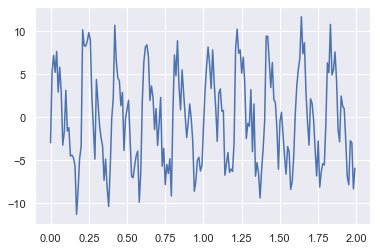

In [66]:
y1 = 6*np.sin(2*np.pi*5*t)
y2 = 3*np.sin(2*np.pi*10*t)
y3 = 2*np.sin(2*np.pi*20*t)
noise = 2*np.random.randn(N)
y = y1 + y2 + y3 + noise
plt.plot(t[:200], y[:200]);

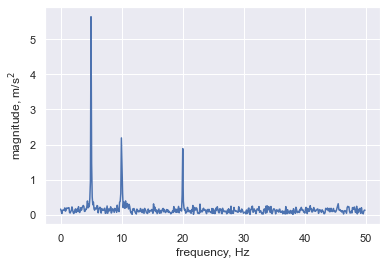

In [67]:
Y = fft(y)
p = np.abs(Y)
A = p[:N//2]*2/N
plt.plot(f, A)

plt.xlabel('frequency, Hz')
plt.ylabel(r'magnitude, m/s$^2$');

## sunspot

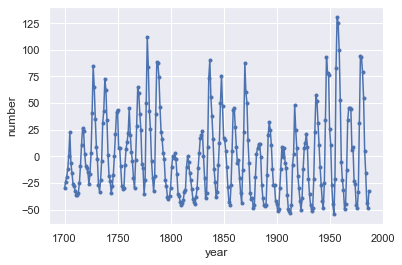

In [17]:
#%% sunspot
sunspot = np.genfromtxt('sunspot.txt', delimiter=',')
year = sunspot[:,0]
number = sunspot[:,1]

a = np.polyfit(year, number, 1)
linear_trend = np.polyval(a, year)
ft = number - linear_trend

plt.plot(year, ft, '.-')
plt.xlabel('year')
plt.ylabel('number')
plt.grid('on');

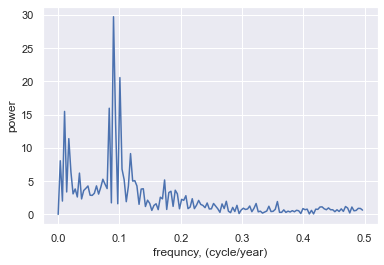

In [18]:
N = len(year)
dt = 1
f = np.arange(N//2)/(N*dt)

F = np.fft.fft(ft)
F[0] = 0

p = np.abs(F)
A = p[:N//2]*2/N

plt.plot(f, A);
plt.xlabel('frequncy, (cycle/year)')
plt.ylabel('power')
plt.grid('on')
plt.show()

### problem 16.7

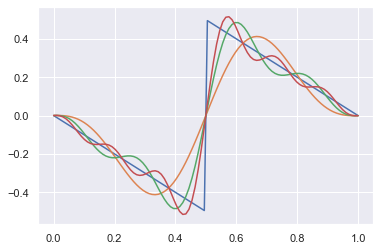

In [19]:
t = np.linspace(0, 1, 100)
def fun(t):
    y = np.empty_like(t)
    for i, t1 in enumerate(t):
        if t1 < 0.5:
            y[i] = -t1
        else:
            y[i] = 1 - t1
    return y

y = fun(t)
plt.plot(t, y)

a, b = fourier_coeff(y, 20)
for n in [3, 5, 7]:
    fourier_plot(n, a, b, t)